In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
#MwMote
combine_car_features = pd.read_csv('finalPreprocessBinaryTogether.csv')
combine_car_label = pd.read_csv('label.csv')
print(combine_car_features.shape)
print(combine_car_label.shape)

(28992, 52)
(28992, 1)


In [3]:
#add columns to existing dataframe
combine_car_features['FraudFound']=combine_car_label 

In [4]:
#shuffle the data.
new_combine_features = combine_car_features.set_index(np.random.permutation(combine_car_features.index))

In [5]:
#now divide the feature and label
new_label = new_combine_features['FraudFound']

#drop the Fraud Found lable
#drop the following attributes
new_combine_features.drop(['FraudFound'],inplace=True,axis=1)
# new_label.shape
# print(new_label)

In [6]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=10, random_state=10)
model= DecisionTreeClassifier(random_state= 42)

results = model_selection.cross_validate(estimator=model,X=new_combine_features,y=new_label,cv=kfold,scoring=scoring)

print(np.mean(results['test_accuracy']))
print(np.mean(results['test_precision']))
print(np.mean(results['test_recall']))
print(np.mean(results['test_f1_score']))


0.967717381737
0.745882479991
0.997811358373
0.829940233256


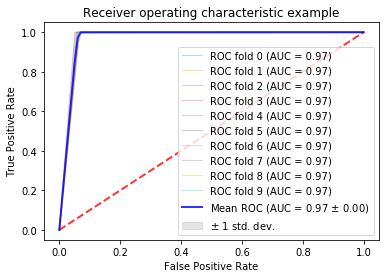

Accuracy: 96.9784322125
Precision: 94.3263327286
Sensitivity: 99.9724137931
Specificity: 93.9844506318
F1_score: 97.0667975907


In [12]:
# Run classifier with cross-validation and plot ROC curves
from sklearn.model_selection import StratifiedKFold
from scipy import interp


cv = StratifiedKFold(n_splits=10)
classifier = DecisionTreeClassifier(random_state=42) 
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

new_combine_features= pd.DataFrame(new_combine_features).values
new_label= pd.Series(new_label).values

#plot of ROC curve for cross validation
accuracy= []
precision= []
sensitivity= []
specificity= []
f1score= []

for train, test in cv.split(new_combine_features, new_label):
    probas_ = classifier.fit(new_combine_features[train], new_label[train]).predict_proba(new_combine_features[test])
    j= 0
    for j in range(probas_.shape[0]):
        if (probas_[j,1]>0.5):
            probas_[j,1]= 1
        else:
            probas_[j,1]= 0

      
    cm = confusion_matrix(new_label[test],probas_[:,1])
    TN, FP, FN, TP = cm.ravel()
    acc= (TP+TN)/(TP+FP+FN+TN)*100
    prec= TP/(TP+FP)*100
    sens= TP/(TP+FN)*100
    spec= TN/(TN+FP)*100
    f1= (2 * prec * sens)/(prec + sens)
    
    accuracy.append(acc)
    precision.append(prec)
    sensitivity.append(sens)
    specificity.append(spec)
    f1score.append(f1)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(new_label[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Accuracy:",np.mean(accuracy))
print("Precision:",np.mean(precision))
print("Sensitivity:",np.mean(sensitivity))
print("Specificity:",np.mean(specificity))
print("F1_score:",np.mean(f1score))


In [11]:
#DT tress with out class imblance.
#random forest without smote with cross validation
car_df = pd.read_csv('newCardata.csv')
car_features = pd.read_csv('finalDataPreprocessBinary.csv')
#change the label of the data
labelNo = LabelEncoder()
car_df['FraudFound'] = labelNo.fit_transform(car_df['FraudFound'].astype('str'))
car_label = car_df['FraudFound']
print(car_label.shape)


cv = StratifiedKFold(n_splits=10)
classifier = DecisionTreeClassifier(random_state=42) 
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
accuracy= []
precision= []
sensitivity= []
specificity= []
f1score= []

car_features= pd.DataFrame(car_features).values
car_label= pd.Series(car_label).values



for train, test in cv.split(car_features, car_label):
    probas_ = classifier.fit(car_features[train], car_label[train]).predict_proba(car_features[test])
    j= 0
    for j in range(probas_.shape[0]):
        if (probas_[j,1]>0.5):
            probas_[j,1]= 1
        else:
            probas_[j,1]= 0

      
    cm = confusion_matrix(car_label[test],probas_[:,1])
    TN, FP, FN, TP = cm.ravel()
    acc= (TP+TN)/(TP+FP+FN+TN)*100
    prec= TP/(TP+FP)*100
    sens= TP/(TP+FN)*100
    spec= TN/(TN+FP)*100
    f1= (2 * prec * sens)/(prec + sens)
    
    accuracy.append(acc)
    precision.append(prec)
    sensitivity.append(sens)
    specificity.append(spec)
    f1score.append(f1)
    
print("Accuracy:",np.mean(accuracy))
print("Precision:",np.mean(precision))
print("Sensitivity:",np.mean(sensitivity))
print("Specificity:",np.mean(specificity))
print("F1_score:",np.mean(f1score))


(15419,)
Accuracy: 88.8320212703
Precision: 15.9447179647
Sensitivity: 20.2571294998
Specificity: 93.198186621
F1_score: 17.8342208852
